<a href="https://colab.research.google.com/github/EngComp-Henrique/Numerical-methods/blob/main/Lecture-2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Erros

## 2.1 Precisão e acurácia
- Certas operações lidam com a incerteza, contendo erros
- **Precisão**: O quanto cada valor, computado/medido, individualmente está próximo dos outros valores computados $⇒$ *Desvio padrão*
- **Acurácia**: O quando o(s) valore(s) medidos estão perto do(s) valor(es) real $⇒$ Valor medido $-$ valor atual

## Grau de precisão
- Menor valor que pode ser computado
- **Exemplo**: O maior/menor número que um computador consegue armazenar

### Em um computador
- Algoritmo usado
- Capacidade de armazenamento
- O número de digitos armazenados

![](https://engcourses-uofa.ca/wp-content/uploads/NA1.png)

## 2.2 Erros aleatórios e sistemáticos
- **Erro aleatório**: Em sistemas computacionais, está ligado ao arredondamento e flutuação de valores que acontece de forma aleatória
- **Erro sistemático**: Ligado ao *bias* no sistema computacional

## 2.3 Tipos de erros

### Erro absoluto

$$
E = V_{t} - V_{a}
$$

- Onde:
    - $E$: Erro
    - $V_{a}$: O valor medido
    - $V_{t}$: O valor real aproximado

### Erro relativo

$$
E_{r}=\dfrac{E}{V_{t}}
$$

### Mas e não soubermos o valor real?
- Dado que $ɛ$ é uma aproximação para o erro, então $ɛ_{r}$ é considerada uma aproximação relativa, definida como:

$$
ɛ_{r}=\dfrac{ɛ}{V_{a}}
$$

- Observação
    - Temos que tomar cuidado para casos em que os valores no divisor não sejam 0

## 2.4 Erros em computação
- Solução com números flutuantes não são exatas, então precisamos de soluções aproximadas
- Com isso, devemos minimizar o erro, considerando o problema para que haja custo-benefício

### Tipos de erros
- **Arredondamento**: Erro inerente, que não é controlado. Acontece devido as limitações do computador
    - Um número será colocado para cima ou para baixo
- **Trucamento**: O valor é travador em um determinado ponto. Valor aproximado para um erro
    - Quando pegamos uma soma infinita e limitamos essa soma
    - Diferença entre o valor atual e valor calculado
    - π = 3.14

### Exemplo
> Calcule o erro $E$, o erro relativo $E_{r}$, e o erro relativo aproximado $\varepsilon_{r}$, se usarmos $\frac{22}{7}$ como aproximação de $\pi$

**Solução**

$$
E=\pi - \frac{22}{7}\\~\\
E_{r}=\frac{\pi - \frac{22}{7}}{\pi}\\~\\
\varepsilon_{r}=\frac{\pi - \frac{22}{7}}{\frac{22}{7}}
$$

In [1]:
import numpy as np

In [2]:
E = np.pi - 22 / 7
E_r = E / np.pi
e_r = (np.pi - 22 / 7) / (22 / 7)

In [3]:
print(f"""Erro{E:>45}
Erro relativo{E_r:>36}
Erro relativo aproximado{e_r:>26}""")

Erro                       -0.0012644892673496777
Erro relativo              -0.0004024994347707008
Erro relativo aproximado   -0.00040233749415671566


### Exemplo 2: 
> Aproximações por séries de Taylor da função seno

**Solução**:
$$
f(x)=\sum_{n=0}^{\infty} \dfrac{(-1)^{n}x^{2n+1}}{(2n+1)!}=\sin(x)
$$

In [4]:
x = np.linspace(-np.pi, np.pi, 200)

def f(x, n):
    return ((-1) ** n * (x) ** (2 * n + 1)) / np.math.factorial(2 * n + 1)

- Calculando seno de 0.3

In [5]:
y = np.zeros(3)
for n in range(2):
    y += f(0.3, n)
y[0]

0.2955

- Calculando erro de truncamento

In [6]:
T = np.sin(0.3) - y[0]
T

2.0206661339561283e-05

In [7]:
import matplotlib.pyplot as plt

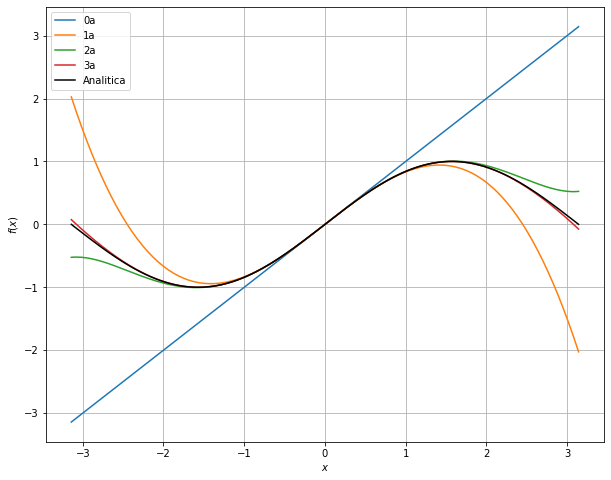

In [8]:
y = np.zeros(len(x))
plt.figure(figsize=(10, 8))
for n, label in zip(range(4), [str(j) + 'a' for j in range(4)]):
    y += f(x, n)
    plt.plot(x, y, label=label)
plt.plot(x, np.sin(x), 'k', label='Analitica')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

### Erros de truncamento
- Considere a expansão de uma série de Taylor:

$$
f(x_{0} + h)=f(x_{0})+f'(x_{0})h+f''(x_{0})\frac{h^{2}}{2!}+f'''(x_{0})\frac{h^{3}}{3!}+\, ....
$$

- Onde:
    - $f(x_{0})$ é chamado de ponto base
    - $h$ é o passo
    - $f'(x_{0})=\dfrac{df}{dx}\Bigg|_{x_0}$
    - $h=(x-x_0)=\Delta x$

- Com isso, se truncarmos essa soma infinita teremos:

$$
f(x_{0} + h)=f(x_{0})+f'(x_{0})h+\text{Truncation error}
$$

### Estimando erro de maneira iterativa
- $v_i$ é uma aproximação de um valor obtido a partir do método iterativo cada iteração produz um valor $v_{in}$, então o erro de aproximação relativo é definido como:

$$
ɛ_r=\dfrac{|v_{in}-v_{in-1}|}{|v_i|}
$$

- Onde:
    - $v_{in}$ é o valor da iteração atual 
    - $v_{in+1}$ é o valor da próxima iteração
    - Caso de parada: $|ɛ_r| < ɛ_s$, onde $ɛ_s$ é a tolerância 

\\
- São feitas iterações até que nosso erro seja menor do que um valor de tolerância
- **Tolerância** é um valor que é aceitável para que haja erro

## Problema 1
Considere o seguinte problema:

$$
\begin{align}
&x_1=\dfrac{1}{3}\\
&x_{n+1}=4x_n-1, \, n=1,2,...
\end{align}
$$

Implemente a série iterativa, calculando o erro e o erro realtivo a cada iteração

In [9]:
def rel_error(vi, vii):
    return abs(vi - vii) / vi

def abs_error(vi, vii):
    return abs(vi - vii)

In [10]:
def solve(m):
    x = np.zeros(m + 1)
    x[0] = 1 / 3
    for n in range(0, m):
        x[n + 1] = 4 * x[n] - 1
        ea = abs_error(x[n], x[n + 1])
        er = rel_error(x[n], x[n + 1])
        print(f"Iteração: {n + 1}")
        print(f"Valor anterior: {x[n]}")
        print(f"Valor atual: {x[n + 1]}")
        print(f"Erro absoluto: {ea}")
        print(f"Erro relativo: {er}")
        print('-' * 50)
    print(x)

In [11]:
solve(5)

Iteração: 1
Valor anterior: 0.3333333333333333
Valor atual: 0.33333333333333326
Erro absoluto: 5.551115123125783e-17
Erro relativo: 1.6653345369377348e-16
--------------------------------------------------
Iteração: 2
Valor anterior: 0.33333333333333326
Valor atual: 0.33333333333333304
Erro absoluto: 2.220446049250313e-16
Erro relativo: 6.661338147750941e-16
--------------------------------------------------
Iteração: 3
Valor anterior: 0.33333333333333304
Valor atual: 0.33333333333333215
Erro absoluto: 8.881784197001252e-16
Erro relativo: 2.664535259100378e-15
--------------------------------------------------
Iteração: 4
Valor anterior: 0.33333333333333215
Valor atual: 0.3333333333333286
Erro absoluto: 3.552713678800501e-15
Erro relativo: 1.065814103640154e-14
--------------------------------------------------
Iteração: 5
Valor anterior: 0.3333333333333286
Valor atual: 0.3333333333333144
Erro absoluto: 1.4210854715202004e-14
Erro relativo: 4.263256414560662e-14
-----------------------

## Problema 2
A largura de uma viga de concreto é 250mm e o comprimento é 10mm. Um dispositivo de medição de comprimento mediu a largura em 247mm enquanto que o comprimento foi de 9,997mm. Encontro o erro e o erro relativo em cada caso

**Solução**

In [12]:
# Definindo valores
Vt_width, Va_width = 250e-3, 247e-3
Vt_length, Va_length = 10000, 9997

In [13]:
E_width = Vt_width - Va_width
Er_width = E_width / Vt_width * 100
print("Valor do erro relativo - LARGURA")
print(f"Erro = {E_width:>20.1e}")
print(f"Erro relativo = {Er_width:>10.2f}%")

Valor do erro relativo - LARGURA
Erro =              3.0e-03
Erro relativo =       1.20%


In [14]:
E_length = (Vt_length - Va_length)
Er_length = E_length / Vt_length * 100
print("Valor do erro relativo - COMPRIMENTO")
print(f"Erro = {E_length:>20.1e}")
print(f"Erro relativo = {Er_length:>10.2f}%")

Valor do erro relativo - COMPRIMENTO
Erro =              3.0e+00
Erro relativo =       0.03%


## Problema 2
Use o método babilônico para encontrar a raiz quadrada de 23.67 e 19532. Para cada caso use uma estimativa inicial de 1. Use como critério de parada $e_s=0.1\,\%$. Informe a resposta:

1. Para 4 dígitos significantes
2. Para 4 casas decimais

**Solução**

⇒ Estimativa inicial: $x_0=1$

$$
x_n=\Bigg[\dfrac{x_{n-1}+\frac{23.67}{x_{n-1}}}{2}\Bigg]
$$

⇒ Usado para achar $x_1, x_2, x_3,...$

⇒ Vamor parar quando o erro absoluto for menor que o valor especificado

$$
|e_r|=\Bigg|\dfrac{x_n - x_{n-1}}{x_n}\Bigg| \leq e_s\\
e_s=0.1\, \% → e_s = 0.001
$$


In [15]:
def abs_error(xn, x_n1):
    return (xn - x_n1) / xn

In [16]:
def sqrt_babylonian_method(number=2, tol=0.001):
    x0 = 1
    x = []
    x.append(x0)
    errors = [float('inf')]
    it, n = 0, 1
    while True:
        if abs(errors[-1]) <= tol:
            break
        temp_value = (x[n - 1] + number / x[n - 1]) / 2
        x.append(temp_value)
        error = abs_error(x[n], x[n - 1])
        errors.append(error)
        it += 1
        n += 1
    return x, errors, it

In [17]:
values, error, it  = sqrt_babylonian_method(23.67)
print(f"{'#':<20}{'Value':>30}{'Error':>50}")
for i in range(it + 1):
    print(f"{i:<20}{values[i]:>30}{error[i]:>50}")
print('-' * 100)
print(f"Total de iterações: {it}")
print(f"Raiz quadrada de 23.67 = {values[-1]:.4f} (casas decimais)")
print(f"Raiz quadrada de 23.67 = {str(values[-1])[:5]} (4 dígitos significantes")

#                                            Value                                             Error
0                                                1                                               inf
1                                           12.335                                0.9189298743413052
2                                7.126964937170653                               -0.7307507625955706
3                                5.224077140277145                              -0.36425338788020983
4                                 4.87751047688996                              -0.07105400696302865
5                                4.865198001833226                            -0.0025307243512174963
6                                4.865182422093002                           -3.2022931254127847e-06
----------------------------------------------------------------------------------------------------
Total de iterações: 6
Raiz quadrada de 23.67 = 4.8652 (casas decimais)
Raiz quadrada de 23.

In [18]:
values, error, it  = sqrt_babylonian_method(19532)
print(f"{'#':<20}{'Value':>30}{'Error':>50}")
for i in range(it + 1):
    print(f"{i:<20}{values[i]:>30}{error[i]:>50}")
print('-' * 100)
print(f"Total de iterações: {it}")
print(f"Raiz quadrada de 19532 = {values[-1]:.4f} (casas decimais)")
print(f"Raiz quadrada de 19532 = {str(values[-1])[:5]} (4 dígitos significantes")

#                                            Value                                             Error
0                                                1                                               inf
1                                           9766.5                                 0.999897609174218
2                                4884.249948804587                               -0.9995905415099275
3                                 2444.12446257394                               -0.9983638409563309
4                               1226.0579361496084                               -0.9934820292829117
5                                620.9943339127921                               -0.9743464137980156
6                                326.2235584332166                               -0.9035851883147179
7                               193.04830509752276                               -0.6898545587769722
8                                147.1125272825695                              -0.31224926

## Problema 3

A função $\cos(x)$ onde $x$ está em radianos pode ser representado como uma serie infinita:

$$
\cos(x)=1-\dfrac{x^{2}}{2!}+\dfrac{x^{4}}{4!}-...=\sum_{n=0}^{∞}\dfrac{(-1)^{n}}{(2n)!}x^{2n}
$$

Sendo $i$ o número de termos usados para aproximar a função $\cos(x)$. Desenhe a cura mostrando o erro aproximado relativo como uma função do número de termos usados quando aproximando de $\cos(1.5)$ e $\cos(10)$. Também, desenhe a curva mostrando o valor da aproximação de cada caso como uma função de $i$

**Solução**

⇒ Tendo a equação, basta escrever um script que calcule o valor do $\cos(x)$ para diferentes valores de iteração

⇒ Reaproveitar a função de erro 

In [19]:
def relative_approximation_error(curr_app, prev_app):
    return (curr_app - prev_app) / curr_app

In [20]:
def approx_cos(x, n):
    value = 0
    for i in range(n):
        value += ((-1) ** i / np.math.factorial(2 * i)) * x ** (2 * i)
    return value, i

In [21]:
k = 20
arr_015 = np.full(k, np.inf)
error_015 = np.full(k, np.inf)

arr_10 = np.full(k, np.inf)
error_10 = np.full(k, np.inf)

its_015 = np.zeros(k)
its_10 = np.zeros(k)

for i in range(1, k + 1):
    t, it = approx_cos(1.5, i)
    arr_015[i - 1] = t
    its_015[i - 1] = it

    t, it = approx_cos(10, i)
    arr_10[i - 1] = t
    its_10[i - 1] = it
    if i >= 2:
        if arr_10[i - 1] < np.inf and arr_10[i - 2] < np.inf:
            error_10[i - 2] = relative_approximation_error(arr_10[i - 1], arr_10[i - 2])
        if arr_015[i - 1] < np.inf and arr_015[i - 2] < np.inf:
            error_015[i - 2] = relative_approximation_error(arr_015[i - 1], arr_015[i - 2])

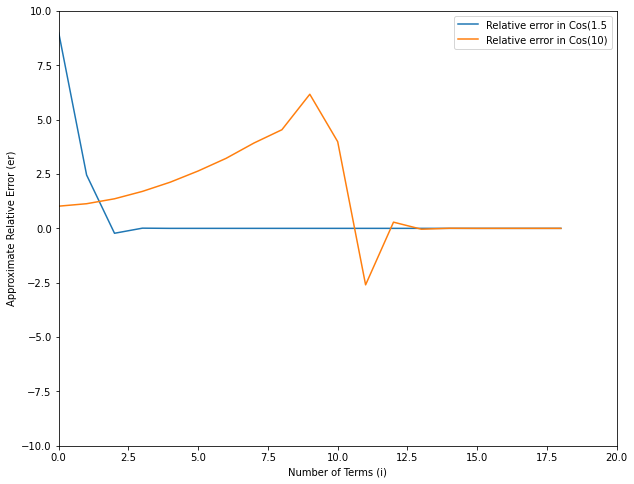

In [22]:
def rel_error_plot():
    plt.figure(figsize=(10, 8))

    plt.plot(its_015, error_015, label="Relative error in Cos(1.5")
    plt.plot(its_10, error_10, label="Relative error in Cos(10)")

    plt.xlabel("Number of Terms (i)", labelpad=4)
    plt.ylabel("Approximate Relative Error (er)", labelpad=4)

    plt.xlim([0, 20])
    plt.ylim([-10, 10])

    plt.legend()
    plt.show()

rel_error_plot()

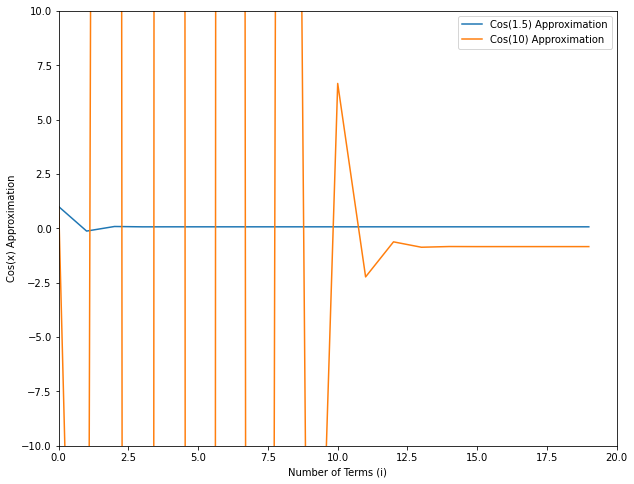

In [23]:
def approx_cos_plot():
    plt.figure(figsize=(10, 8))

    plt.plot(its_015, arr_015, label="Cos(1.5) Approximation")
    plt.plot(its_10, arr_10, label="Cos(10) Approximation")

    plt.xlabel("Number of Terms (i)", labelpad=4)
    plt.ylabel("Cos(x) Approximation", labelpad=4)

    plt.xlim([0, 20])
    plt.ylim([-10, 10])

    plt.legend()
    plt.show()

approx_cos_plot()

## Referências
- [Youtube video](https://www.youtube.com/watch?v=4SnKNfMGAMY)
- [Engineering at Alberta](https://engcourses-uofa.ca/books/numericalanalysis/errors/description-and-definitions/)